In [2]:
import pandas as pd
year = 2022
url = f"https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value={year}"
table_list = pd.read_html(url)
# table_list
df = table_list[0]
df.head()

Date  20 YR  30 YR  Extrapolation Factor  8 WEEKS BANK DISCOUNT  \
0  01/03/2022    NaN    NaN                   NaN                    NaN   
1  01/04/2022    NaN    NaN                   NaN                    NaN   
2  01/05/2022    NaN    NaN                   NaN                    NaN   
3  01/06/2022    NaN    NaN                   NaN                    NaN   
4  01/07/2022    NaN    NaN                   NaN                    NaN   

   COUPON EQUIVALENT  52 WEEKS BANK DISCOUNT  COUPON EQUIVALENT.1  1 Mo  2 Mo  \
0                NaN                     NaN                  NaN  0.05  0.06   
1                NaN                     NaN                  NaN  0.06  0.05   
2                NaN                     NaN                  NaN  0.05  0.06   
3                NaN                     NaN                  NaN  0.04  0.05   
4                NaN                     NaN                  NaN  0.05  0.05   

   3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  20 Yr  30 Yr  
0  0.08  0.22  0.40  0.78  1.04  1.37  1.55   1.63   2.05   2.01  
1  0.08  0.22  0.38  0.77  1.02  1.37  1.57   1.66   2.10   2.07  
2  0.09  0.22  0.41  0.83  1.10  1.43  1.62   1.71   2.12   2.09  
3  0.10  0.23  0.45  0.88  1.15  1.47  1.66   1.73   2.12   2.09  
4  0.10  0.24  0.43  0.87  1.17  1.50  1.69   1.76   2.15   2.11

In [3]:
df.columns

Index(['Date', '20 YR', '30 YR', 'Extrapolation Factor',
       '8 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT', '52 WEEKS BANK DISCOUNT',
       'COUPON EQUIVALENT.1', '1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr',
       '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr'],
      dtype='object')

In [4]:
# df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# df

In [6]:
# df = df.drop(['20 YR', '30 YR', 'Extrapolation Factor',
#        '8 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT', '52 WEEKS BANK DISCOUNT',
#        'COUPON EQUIVALENT.1'],axis=1)

In [7]:
# df

In [8]:
# df=df.set_index('Date')
# df

In [9]:
def clean_df(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df = df.drop(['20 YR', '30 YR', 'Extrapolation Factor',
       '8 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT', '52 WEEKS BANK DISCOUNT',
       'COUPON EQUIVALENT.1','2 Mo'],axis=1)
    return df

In [10]:
df = clean_df(df)

In [11]:
df

1 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  20 Yr  \
Date                                                                       
2022-01-03  0.05  0.08  0.22  0.40  0.78  1.04  1.37  1.55   1.63   2.05   
2022-01-04  0.06  0.08  0.22  0.38  0.77  1.02  1.37  1.57   1.66   2.10   
2022-01-05  0.05  0.09  0.22  0.41  0.83  1.10  1.43  1.62   1.71   2.12   
2022-01-06  0.04  0.10  0.23  0.45  0.88  1.15  1.47  1.66   1.73   2.12   
2022-01-07  0.05  0.10  0.24  0.43  0.87  1.17  1.50  1.69   1.76   2.15   
...          ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   
2022-07-21  2.15  2.48  3.00  3.11  3.10  3.07  3.00  2.99   2.91   3.33   
2022-07-22  2.15  2.49  2.97  3.01  2.98  2.93  2.87  2.85   2.77   3.23   
2022-07-25  2.14  2.62  3.06  3.07  3.00  2.98  2.89  2.89   2.81   3.28   
2022-07-26  2.17  2.55  3.01  3.06  3.02  3.01  2.89  2.88   2.81   3.27   
2022-07-27  2.14  2.44  2.93  3.00  2.96  2.93  2.82  2.83   2.78   3.26   

            30 Yr  
Date               
2022-01-03   2.01  
2022-01-04   2.07  
2022-01-05   2.09  
2022-01-06   2.09  
2022-01-07   2.11  
...           ...  
2022-07-21   3.08  
2022-07-22   3.00  
2022-07-25   3.04  
2022-07-26   3.03  
2022-07-27   3.03  

[142 rows x 11 columns]

In [12]:
import seaborn as sns

<AxesSubplot:ylabel='Date'>

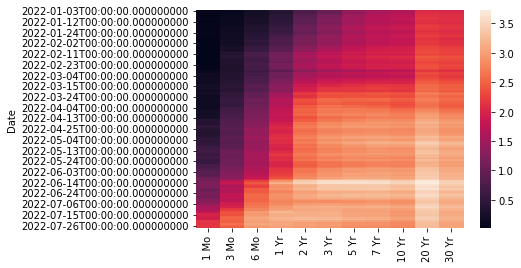

In [13]:
sns.heatmap(df)

In [14]:
for year in range(2010,2021):
    url = f"https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value={year}"
    table_list = pd.read_html(url)
    df = pd.concat([df,clean_df(table_list[0])]) 

In [15]:
df

1 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  20 Yr  \
Date                                                                       
2022-01-03  0.05  0.08  0.22  0.40  0.78  1.04  1.37  1.55   1.63   2.05   
2022-01-04  0.06  0.08  0.22  0.38  0.77  1.02  1.37  1.57   1.66   2.10   
2022-01-05  0.05  0.09  0.22  0.41  0.83  1.10  1.43  1.62   1.71   2.12   
2022-01-06  0.04  0.10  0.23  0.45  0.88  1.15  1.47  1.66   1.73   2.12   
2022-01-07  0.05  0.10  0.24  0.43  0.87  1.17  1.50  1.69   1.76   2.15   
...          ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   
2020-12-24  0.09  0.09  0.09  0.10  0.13  0.17  0.37  0.66   0.94   1.46   
2020-12-28  0.09  0.11  0.11  0.11  0.13  0.17  0.38  0.65   0.94   1.46   
2020-12-29  0.08  0.10  0.12  0.11  0.12  0.17  0.37  0.66   0.94   1.47   
2020-12-30  0.06  0.08  0.09  0.12  0.12  0.17  0.37  0.66   0.93   1.46   
2020-12-31  0.08  0.09  0.09  0.10  0.13  0.17  0.36  0.65   0.93   1.45   

            30 Yr  
Date               
2022-01-03   2.01  
2022-01-04   2.07  
2022-01-05   2.09  
2022-01-06   2.09  
2022-01-07   2.11  
...           ...  
2020-12-24   1.66  
2020-12-28   1.67  
2020-12-29   1.67  
2020-12-30   1.66  
2020-12-31   1.65  

[2895 rows x 11 columns]

In [16]:
df = df.sort_index()

In [17]:
df

1 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  20 Yr  \
Date                                                                       
2010-01-04  0.05  0.08  0.18  0.45  1.09  1.66  2.65  3.36   3.85   4.60   
2010-01-05  0.03  0.07  0.17  0.41  1.01  1.57  2.56  3.28   3.77   4.54   
2010-01-06  0.03  0.06  0.15  0.40  1.01  1.60  2.60  3.33   3.85   4.63   
2010-01-07  0.02  0.05  0.16  0.40  1.03  1.62  2.62  3.33   3.85   4.62   
2010-01-08  0.02  0.05  0.15  0.37  0.96  1.56  2.57  3.31   3.83   4.61   
...          ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   
2022-07-21  2.15  2.48  3.00  3.11  3.10  3.07  3.00  2.99   2.91   3.33   
2022-07-22  2.15  2.49  2.97  3.01  2.98  2.93  2.87  2.85   2.77   3.23   
2022-07-25  2.14  2.62  3.06  3.07  3.00  2.98  2.89  2.89   2.81   3.28   
2022-07-26  2.17  2.55  3.01  3.06  3.02  3.01  2.89  2.88   2.81   3.27   
2022-07-27  2.14  2.44  2.93  3.00  2.96  2.93  2.82  2.83   2.78   3.26   

            30 Yr  
Date               
2010-01-04   4.65  
2010-01-05   4.59  
2010-01-06   4.70  
2010-01-07   4.69  
2010-01-08   4.70  
...           ...  
2022-07-21   3.08  
2022-07-22   3.00  
2022-07-25   3.04  
2022-07-26   3.03  
2022-07-27   3.03  

[2895 rows x 11 columns]

In [18]:
import plotly.graph_objects as go
import plotly.offline as pyo
import pandas as pd
import numpy as np


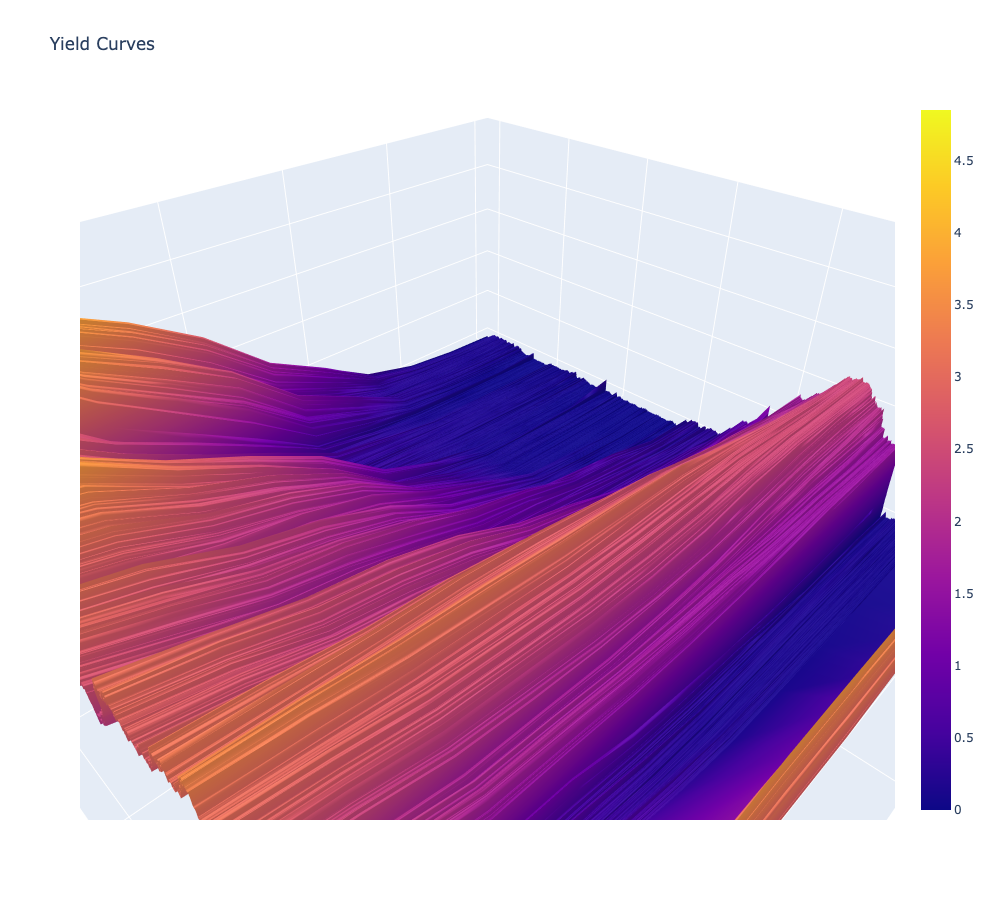

In [19]:
x = df.columns
y = df.index
z = df.to_numpy()

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='US Treasury Interest Rates',
                  width=1100, height=700,
                  scene = {"aspectratio": {"x": 1, "y": 1, "z": 0.4}})
fig.show()
fig.write_image("InterestRates.jpeg")

In [1]:
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen
    
import pandas as pd
import certifi
import json
from pathlib import Path
%matplotlib inline

In [2]:
def get_jsonparsed_data(url):
    response = urlopen(url, cafile=certifi.where())
    data = response.read().decode("utf-8")
    return json.loads(data)

In [12]:
url = ("https://financialmodelingprep.com/api/v4/economic?name=smoothedUSRecessionProbabilities&from=2019-07-10&to=2022-07-10&apikey=eef11245e039afd02560c03e5e86851d")
       

In [13]:
data=get_jsonparsed_data(url)
print(json.dumps(data, indent=4))

[
    {
        "date": "2022-05-01",
        "value": 0.48
    },
    {
        "date": "2022-04-01",
        "value": 0.04
    },
    {
        "date": "2022-03-01",
        "value": 0.06
    },
    {
        "date": "2022-02-01",
        "value": 0.02
    },
    {
        "date": "2022-01-01",
        "value": 0.02
    },
    {
        "date": "2021-12-01",
        "value": 0.1
    },
    {
        "date": "2021-11-01",
        "value": 0.02
    },
    {
        "date": "2021-10-01",
        "value": 0.02
    },
    {
        "date": "2021-09-01",
        "value": 0.36
    },
    {
        "date": "2021-08-01",
        "value": 0.34
    },
    {
        "date": "2021-07-01",
        "value": 0.04
    },
    {
        "date": "2021-06-01",
        "value": 0.02
    },
    {
        "date": "2021-05-01",
        "value": 0.1
    },
    {
        "date": "2021-04-01",
        "value": 0.52
    },
    {
        "date": "2021-03-01",
        "value": 0.02
    },
    {
        "date": "20

/tmp/ipykernel_1434/654040892.py:2: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


In [14]:
var = pd.DataFrame(data)
var

date   value
0   2022-05-01    0.48
1   2022-04-01    0.04
2   2022-03-01    0.06
3   2022-02-01    0.02
4   2022-01-01    0.02
5   2021-12-01    0.10
6   2021-11-01    0.02
7   2021-10-01    0.02
8   2021-09-01    0.36
9   2021-08-01    0.34
10  2021-07-01    0.04
11  2021-06-01    0.02
12  2021-05-01    0.10
13  2021-04-01    0.52
14  2021-03-01    0.02
15  2021-02-01    0.02
16  2021-01-01    0.00
17  2020-12-01    0.04
18  2020-11-01    0.44
19  2020-10-01    0.02
20  2020-09-01    0.02
21  2020-08-01    0.00
22  2020-07-01    0.00
23  2020-06-01    0.02
24  2020-05-01    0.04
25  2020-04-01  100.00
26  2020-03-01  100.00
27  2020-02-01    0.20
28  2020-01-01    0.22
29  2019-12-01    0.50
30  2019-11-01    0.40
31  2019-10-01    1.24
32  2019-09-01    0.84
33  2019-08-01    0.24

<AxesSubplot:title={'center':'Fed Monthly Estimate for Recession from August 2019 to May 2022'}, xlabel='Data', ylabel='% Chance'>

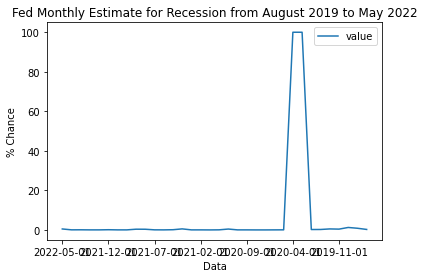

In [15]:
bar = var.set_index('date')
#data.head()
#plot(data)
#bar.plot(kind='bar',figsize=(20,20))
bar.plot.line(xlabel='Data', ylabel='% Chance', title='Fed Monthly Estimate for Recession from August 2019 to May 2022')

<AxesSubplot:title={'center':'Fed Monthly Estimate for Recession from August 2019 to May 2022'}, xlabel='Data', ylabel='% Chance'>

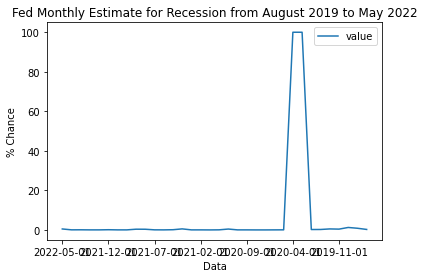

In [16]:
bar.plot.line(xlabel='Data', ylabel='% Chance', title='Fed Monthly Estimate for Recession from August 2019 to May 2022')